In [7]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM


In [8]:
dat=ascii.read('Tang24.txt')
Catalog=ascii.read("../../A-Catalogs/Binospec-Candels.cat")

In [10]:
np.mean(dat["DV"])

225.9620253164557

In [55]:
EW=dat['EWLya']
Muv=dat['MUV']


def ab_mag_to_flux(mag):
    return 10**((mag + 48.6) / -2.5)


In [56]:
flux=[]
for i in Muv:
    i = i.replace('−', '-')  # Replace non-standard minus sign with standard one
    i=float(i)
    print(i)
    flux.append(ab_mag_to_flux(i))

-18.05
-19.25
-19.52
-18.68
-19.63
-18.39
-18.21
-19.88
-17.96
-18.34
-18.73
-20.11
-17.94
-18.33
-19.32
-19.02
-19.28
-19.72
-18.4
-19.05
-18.49
-19.17
-18.14
-20.16
-19.86
-17.68
-18.01
-18.42
-20.14
-21.3
-19.39
-18.84
-18.95
-18.64
-17.73
-17.86
-18.16
-18.71
-18.76
-19.24
-17.93
-17.85
-18.16
-17.69
-18.79
-18.12
-18.77
-18.96
-19.56
-20.23
-19.31
-17.86
-18.81
-17.93
-17.93
-18.09
-17.19
-19.77
-18.88
-19.54
-19.66
-18.49
-19.6
-18.43
-20.69
-18.77
-19.32
-19.92
-19.56
-19.7
-20.14
-21.05
-18.7
-19.4
-20.02
-19.84
-19.13
-19.63
-19.11


DEIMOS-33_17705
Lyman Alpha Flux: 4.241e-18 erg/s/cm²
Ha flux : 5.298369161314348e-18
DEIMOS-32_16773
Lyman Alpha Flux: 3.427e-18 erg/s/cm²
Ha flux : 3.824343872116222e-18


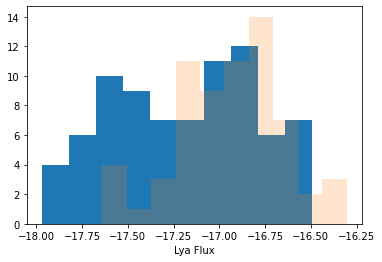

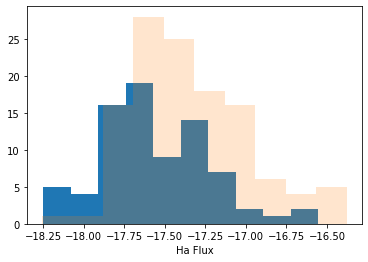

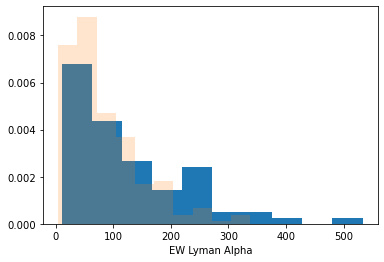

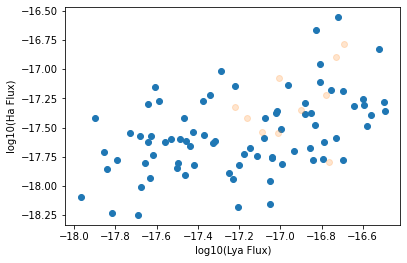

In [143]:
import numpy as np

def Ha_from_fesc(Lya,fesc):
    ha=Lya/(8.7*fesc)
    return ha


def compute_lyman_alpha_flux(uv_magnitude, redshift, ew_rest):
    cosmo   =   FlatLambdaCDM(H0=70,Om0=0.3,Tcmb0=2.725)
    dL      =   cosmo.luminosity_distance(redshift).value
    mapp        =   uv_magnitude+5*(np.log10(dL*10**6) - 1)
    # Constants
    c = 3e18  # Speed of light in Å/s
    lambda_uv = 1500  # Central wavelength of UV light in Å
    
    # Step 1: Convert UV magnitude to flux density (f_nu)
    f_nu = 10**(-0.4 * (mapp + 48.6))  # in erg/s/cm²/Hz
    
    # Step 2: Convert f_nu to f_lambda
    f_lambda = f_nu * c / (lambda_uv**2)  # in erg/s/cm²/Å
    
    # Step 3: Compute observed equivalent width (EW_obs)
    ew_obs = ew_rest   # in Å
    
    # Step 4: Compute Lyman Alpha flux (F_Lyα)
    f_lyman_alpha = f_lambda * ew_obs  # in erg/s/cm²
    
    return f_lyman_alpha

# Example usage
uv_mag = 20.0  # UV magnitude
redshift = 2.0  # Redshift
ew_rest = 50.0  # Rest-frame equivalent width in Å


Tang_Lya=[]
Tang_Ha=[]
Tang_EWLya=[]
Tang_MUV=[]
Tang_fesc=[]
cases=[]
for gal in dat:
    id=gal['ID']
    uv_mag = float(gal['MUV'].replace('−', '-') )
    redshift = gal['z']
    ew_rest = gal['EWLya']
    fesc=gal['fesc']
    lyman_alpha_flux = compute_lyman_alpha_flux(uv_mag, redshift, ew_rest)
    Ha_flux=Ha_from_fesc(lyman_alpha_flux,fesc)
    if id=="DEIMOS-33_17705" or id=="DEIMOS-32_16773":
        print(id)
        print(f"Lyman Alpha Flux: {lyman_alpha_flux:.3e} erg/s/cm²")
        print(f"Ha flux :", Ha_flux)
        cases.append([id,lyman_alpha_flux,Ha_flux])

    Tang_Lya.append(lyman_alpha_flux)
    Tang_Ha.append(Ha_flux)
    Tang_EWLya.append(ew_rest)
    Tang_MUV.append(uv_mag)
    Tang_fesc.append(fesc)






plt.hist(np.log10(Tang_Lya),bins=10)
plt.hist(Catalog["LyaFlux"],bins=10,alpha=0.2)
plt.xlabel("Lya Flux")
plt.show()
plt.hist(np.log10(Tang_Ha),bins=10)
plt.hist(Catalog["HaFlux"],bins=10,alpha=0.2)
plt.xlabel("Ha Flux")
plt.show()
plt.hist(Tang_EWLya,bins=10,density=True)
plt.hist(Catalog["EWLya"],bins=10,alpha=0.2,density=True)   
plt.xlabel("EW Lyman Alpha")
plt.show()



CatHa=Catalog["HaFlux"]
CatHa= CatHa[Catalog['dHaFlux'] < 0]
CatLya=Catalog["LyaFlux"]
CatLya=CatLya[Catalog['dHaFlux'] < 0]

plt.scatter(np.log10(Tang_Lya),np.log10(Tang_Ha))
plt.scatter(CatLya,CatHa,alpha=0.2)
plt.xlabel("log10(Lya Flux)")
plt.ylabel("log10(Ha Flux)")
plt.show()

In [110]:
Stark11_33_17705=Catalog[Catalog["id_charlotte"]=="Stark11_33_17705"]
Stark11_32_16773=Catalog[Catalog["id_charlotte"]=="Stark11_32_16773"]

In [111]:
print(10**Stark11_33_17705["LyaFlux"])
print(10**Stark11_33_17705["HaFlux"])
print(10**Stark11_32_16773["LyaFlux"])
print(10**Stark11_32_16773["HaFlux"])

       LyaFlux       
---------------------
8.163284323640465e-18
        HaFlux       
---------------------
2.917264383179723e-18
      LyaFlux       
--------------------
4.91351801898222e-18
        HaFlux       
---------------------
2.518600368919642e-18


In [122]:
cases[0]

['DEIMOS-33_17705', 4.2408146767160036e-18, 5.298369161314348e-18]

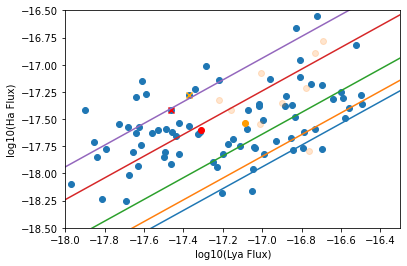

In [211]:
def Ha_from_fesc_log(Lya,fesc):
    ha=Lya/(8.7*fesc)
    return ha


plt.scatter(np.log10(Tang_Lya),np.log10(Tang_Ha))
plt.scatter(Stark11_32_16773["LyaFlux"],Stark11_32_16773["HaFlux"],color="red") #weak
plt.scatter(Stark11_33_17705["LyaFlux"],Stark11_33_17705["HaFlux"],color="orange")
plt.scatter(CatLya,CatHa,alpha=0.2)
plt.scatter(np.log10(cases[1][1]),np.log10(cases[1][2]),color="red",marker="x")
plt.scatter(np.log10(cases[0][1]),np.log10(cases[0][2]),color="orange",marker="x")  

l=np.linspace(-18,-16,100)
h=np.log10(Ha_from_fesc_log(10**l,1))
plt.plot(l,h)
h=np.log10(Ha_from_fesc_log(10**l,0.8))
plt.plot(l,h)
h=np.log10(Ha_from_fesc_log(10**l,0.5))
plt.plot(l,h)
h=np.log10(Ha_from_fesc_log(10**l,0.2))
plt.plot(l,h)
h=np.log10(Ha_from_fesc_log(10**l,0.1))
plt.plot(l,h)

plt.xlabel("log10(Lya Flux)")
plt.ylabel("log10(Ha Flux)")
plt.xlim(-18,-16.3)
plt.ylim(-18.5,-16.5)
plt.show()

In [6]:
(1.3e-17)/(10**-17.8)

8.202445478242526

2.5118864315095718e-18

In [137]:
np.log10(1.1)

0.04139268515822508

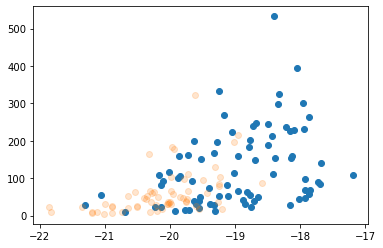

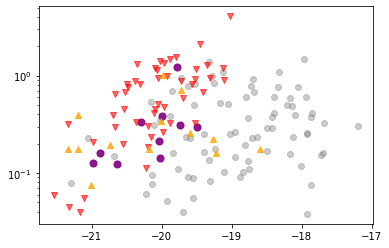

In [201]:
plt.scatter(Tang_MUV,Tang_EWLya)
mask = (Catalog["Type"] == "LAE") 
plt.scatter(Catalog["Muv"][mask],Catalog["EWLya"][mask],alpha=0.2)
plt.show()


mask = (Catalog["Type"] == "LAE") & (Catalog["dfesc"] > -1)  # detection
maskL = (Catalog["Type"] == "LAE") & (np.isnan(Catalog["dfesc"]) == True) & (Catalog["fesc"] > -1)  # LAE lowlim
maskU = (Catalog["Type"] == "NonDetect") & (Catalog["fesc"] > -1)  # uplim



plt.scatter(Tang_MUV,Tang_fesc,color="gray",alpha=0.4)

plt.scatter(Catalog["Muv"][mask],Catalog["fesc"][mask],alpha=0.9,s=50,color="purple")
plt.scatter(Catalog["Muv"][maskU],Catalog["fesc"][maskU],alpha=0.6,marker="v",color="red")
plt.scatter(Catalog["Muv"][maskL],Catalog["fesc"][maskL],alpha=0.8,marker="^",color="#ffa600")

plt.yscale("log")
plt.show()


